# PCA - Principal Component Analysis

A principal component are the new variables created as linear combinations of the original variables, arranged to be uncorrelated.

Steps involed:
1. Standardize the Data
2. Co-Variance Matix calculations
3. Compute the Eigan Vectors and Eigan Values of Co-Variance Matrix to identify Principal Component
4. Create Feature Vector
5. Recast Data along Principal Component

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [4]:
cancer =  load_breast_cancer(as_frame = True)
df = cancer.frame

In [5]:
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


In [6]:
X = df.iloc[:, :-1]   #All rows and columns except the last one

In [7]:
X.shape

(569, 30)

In [8]:
# Standardization

X_mean = X.mean()
X_std = X.std()

Z = (X - X_mean)/(X_std)

In [9]:
round(Z.describe())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,...,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0
mean,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,...,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.0,-2.0,-2.0,-1.0,-3.0,-2.0,-1.0,-1.0,-3.0,-2.0,...,-2.0,-2.0,-2.0,-1.0,-3.0,-1.0,-1.0,-2.0,-2.0,-2.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
75%,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
max,4.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,...,4.0,4.0,4.0,6.0,4.0,5.0,5.0,3.0,6.0,7.0


<Axes: >

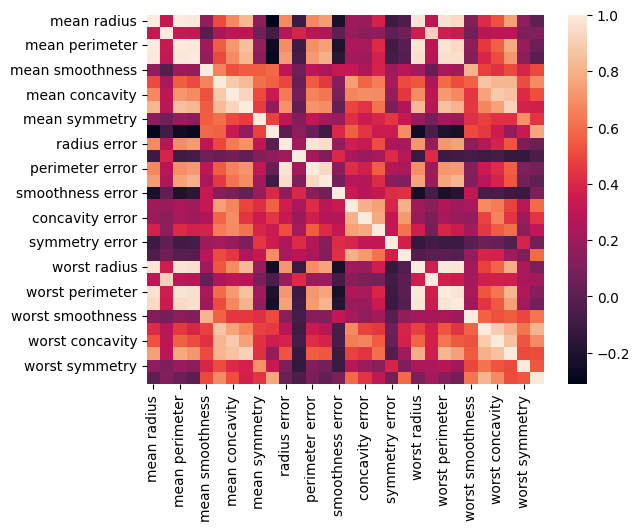

In [12]:
# Compute the Covariance Matrix

c = Z.cov()

sns.heatmap(c)

In [13]:
# Eigen Values and Eigen Vectors

eigenvalue, eigenvector = np.linalg.eig(c)

In [15]:
eigenvalue.shape

(30,)

In [16]:
eigenvector.shape

(30, 30)

In [17]:
idx = eigenvalue.argsort()[::-1]
idx

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 28, 29, 27, 26, 25, 24, 23, 22, 21, 20, 19], dtype=int64)

In [19]:
eigenvalue = eigenvalue[idx]
eigenvector = eigenvector[:, idx]

In [20]:
eigenvalue

array([1.32816077e+01, 5.69135461e+00, 2.81794898e+00, 1.98064047e+00,
       1.64873055e+00, 1.20735661e+00, 6.75220114e-01, 4.76617140e-01,
       4.16894812e-01, 3.50693457e-01, 2.93915696e-01, 2.61161370e-01,
       2.41357496e-01, 1.57009724e-01, 9.41349650e-02, 7.98628010e-02,
       5.93990378e-02, 5.26187835e-02, 4.94775918e-02, 3.11594025e-02,
       2.99728939e-02, 2.74394025e-02, 2.43408378e-02, 1.80550070e-02,
       1.54812714e-02, 8.17763986e-03, 6.90046388e-03, 1.58933787e-03,
       7.48803097e-04, 1.33044823e-04])

Explained Variance is the term that gives us an idea of the amount of the total variance retained by a component.

In [22]:
explained_var = np.cumsum(eigenvalue)/np.sum(eigenvalue)
explained_var

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

In [25]:
n_components = np.argmax(explained_var >= 0.5) +1
n_components

2

In [26]:
u = eigenvector[:, :n_components]

In [28]:
u.shape

(30, 2)

In [30]:
data = np.dot(X, u)
data.shape

(569, 2)

In [31]:
finaldf = pd.DataFrame(data, columns = ['PCA 1', 'PCA 2'])
finaldf

,PCA 1,PCA 2
0,793.364674,-772.386400
1,831.376304,-819.573038
2,751.111800,-737.924156
3,271.973741,-262.394926
4,741.248858,-730.596479
...,...,...
564,904.399203,-887.916357
565,772.937544,-758.802048
566,522.486870,-512.141833
567,801.865190,-785.872631


# Isolation Forest

It works by isolating observation by randomly selecting the feature and then randomly splitting the values between the max and min of the selected feature.<br>
Ideology is Anamolies in the data are very few and different and hence are more susceptible to isolation.

In [32]:
df = pd.read_csv('credit_card_fraud.csv')
df.head(2)

,V1,V2,V3,V4,V5,Amount,Class
0,0.543360,-0.193659,0.968185,-0.213457,0.285803,55.271583,0.0
1,0.982691,0.808058,0.885231,1.352203,1.272570,39.268121,0.0


In [33]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

In [34]:
df.shape

(1000, 7)

In [42]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 25)

In [44]:
iso_forest = IsolationForest(contamination = 0.01, random_state = 25)
iso_forest.fit(X_train)

IsolationForest(contamination=0.01, random_state=25)

In [45]:
train_anamoly_pred = iso_forest.predict(X_train)
train_anamoly_scores = iso_forest.decision_function(X_train)

test_anamoly_pred = iso_forest.predict(X_test)
test_anamoly_scores = iso_forest.decision_function(X_test)

In [51]:
X_test['Anamoly'] = test_anamoly_pred
X_test['Anamoly Score'] = test_anamoly_scores

X_train['Anamoly'] = train_anamoly_pred
X_train['Anamoly Score'] = train_anamoly_scores

In [52]:
X_test['Anamoly'].value_counts()

Anamoly
 1    199
-1      1
Name: count, dtype: int64

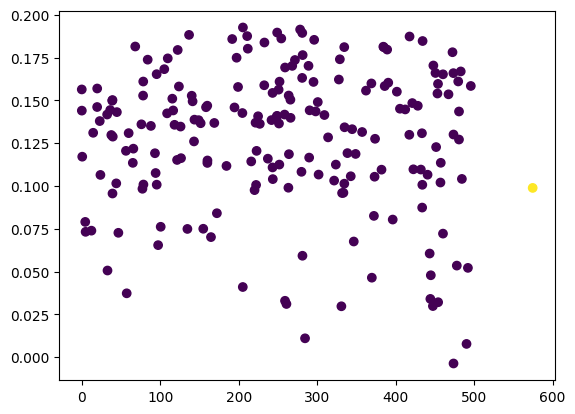

In [53]:
plt.scatter(X_test['Amount'], X_test['Anamoly Score'], c = y_test, cmap = 'viridis')
plt.show()

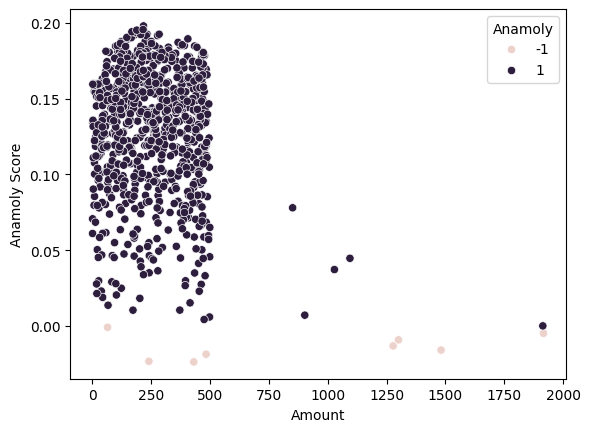

In [57]:
sns.scatterplot(x = 'Amount', y = 'Anamoly Score', data = X_train, hue = 'Anamoly')
plt.show()